<a href="https://colab.research.google.com/github/aguilarmadeira/Optimization/blob/main/Exemplo2_SPEA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.8 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=04a803aa4ab042224a09a34610ca5cefd37db11f1746ef0d10e9838981ecab50
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |     16 |  0.000000E+00 |  0.2079502859 |             - |             -
     2 | 

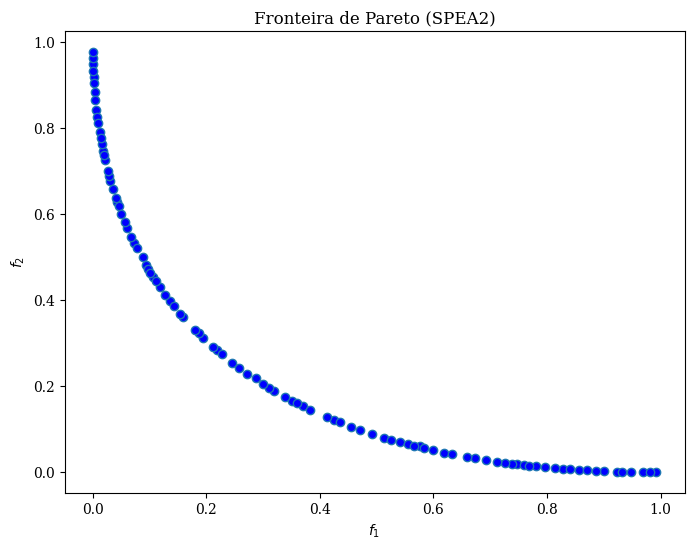

In [1]:
# Instalar pymoo se ainda não estiver instalado
!pip install pymoo

from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.optimize import minimize
from pymoo.core.problem import Problem
from pymoo.visualization.scatter import Scatter
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
import numpy as np

# Definir o problema multiobjetivo
class MyProblem(Problem):
    def __init__(self):
        super().__init__(
            n_var=2,  # Número de variáveis
            n_obj=2,  # Número de funções objetivo
            n_constr=2,  # Número de restrições
            xl=np.array([0, 0]),  # Limite inferior para as variáveis
            xu=np.array([1, 1])   # Limite superior para as variáveis
        )

    # Funções objetivo
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x[:, 0]**2 + x[:, 1]**2  # Primeira função objetivo
        f2 = (x[:, 0] - 1)**2 + x[:, 1]**2  # Segunda função objetivo

        # Restrições
        g1 = x[:, 0] + x[:, 1] - 1
        g2 = x[:, 0]**2 + x[:, 1]**2 - 1

        out["F"] = np.column_stack([f1, f2])  # Funções objetivo
        out["G"] = np.column_stack([g1, g2])  # Restrições

# Configuração do SPEA2
spea2 = SPEA2(
    pop_size=100,  # Tamanho da população
    sampling=FloatRandomSampling(),  # Amostragem inicial
    crossover=SBX(prob=0.9, eta=15),  # Tipo de cruzamento
    mutation=PM(prob=1/2, eta=20),  # Tipo de mutação
    eliminate_duplicates=True
)

# Resolver o problema com SPEA2
problem = MyProblem()
res_spea2 = minimize(
    problem,
    spea2,
    termination=('n_gen', 100),  # Número de gerações
    verbose=True
)

# Visualizar resultados SPEA2
print("Soluções SPEA2 na Fronteira de Pareto:")
print(res_spea2.F)
scatter_spea2 = Scatter(title="Fronteira de Pareto (SPEA2)")
scatter_spea2.add(res_spea2.F, facecolor="blue")
scatter_spea2.show()
